# Projet Machine Learning
### prédiction des étudiants admis

## Table of contents
* [Introduction: Business Problem](#introduction)
* [bibliothèque utilisé](#bibliothèque)
* [Importation et exploration des données ](#data)
* [Correlation](#correlation)
* [Echantillonage des données](#Echantillonage)
* [Entrainement du Modele et prediction des resultas](#prediction)
    * [RandomForest](#RandomForest)
    * [LinearRegression](#LinearRegression)
    * [AdaboostXGBoostClassifierAdmissionPredict](#AdaboostXGBoostClassifierAdmissionPredict)
    * [SVM](#SVM)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>


Cet ensemble de données provient de Kaggle il a été créé dans le but d'aider les étudiants des universités à présélectionner leurs profils. 

Le résultat prévu leur donne une idée juste de leurs chances d'accéder à une université particulière.
 
  Il comporte environ 8 paramètres considérés comme importants lors de la candidature aux programmes de maîtrise. Les paramètres inclus sont: 1. Scores GRE (sur 340) 2. Scores TOEFL (sur 120) 3. Notation universitaire (sur 5) 4. Énoncé de mission ( Statement of Purpose) sur 5) 5. Lettre de recommandation  (sur 5) 6. CGPA d (sur 10) 6. Expérience en recherche (0 ou 1) 7. Chance d'admission (de 0 à 1)

## les bibliothèques utilisés <a name="bibliothèque"></a>

In [4]:
import numpy as np # la bibliotheque numpy est parmi les bibliotheques de python les plus populaire 
#qui sert a manipuler les tableau et les vecteur 
import pandas as pd # permettant la manipulation et l'analyse des données

import matplotlib.pyplot as plt #tracer et visualiser des données sous formes de graphiques
import seaborn as sns # Seaborn est une bibliothèque de visualisation de données Python basée sur matplotlib.

## Importation et exploration des données  <a name="data"></a>

In [6]:
df = pd.read_csv('Admission_Predict.csv')

In [7]:
df.head()#rappeler vous que la fonction head est parametrable

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


on vas supprimons la colonne non pertinente et vérifions s'il y a des valeurs nulles dans l'ensemble de données

In [8]:
df = df.drop(['Serial No.'], axis=1)
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## Correlation <a name="correlation"></a>

Comprendre la relation entre les différents facteurs responsables des admissions aux cycles supérieurs

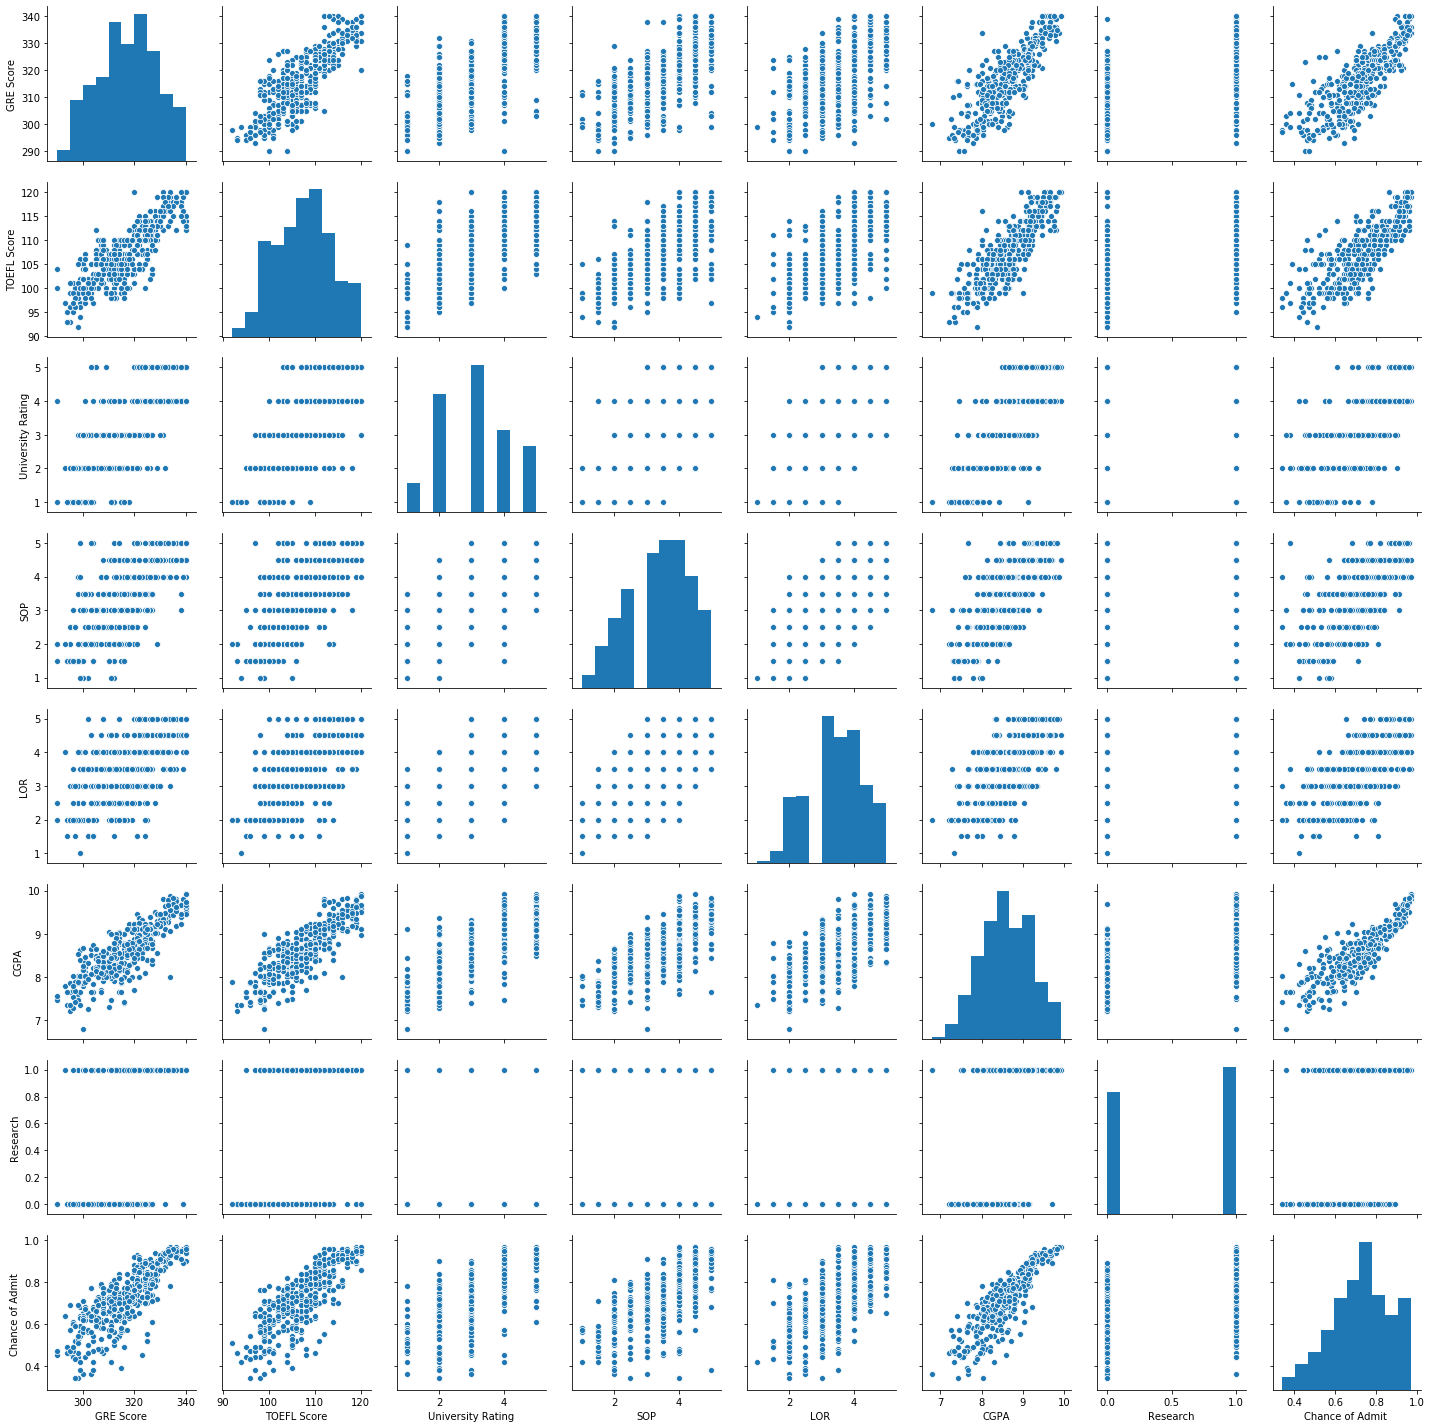

In [10]:
# Create the default pairplot
sns.pairplot(df)

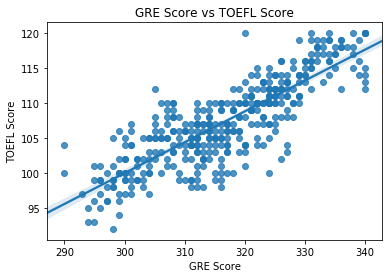

In [11]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

on remarque que Les personnes ayant des scores GRE plus élevés ont également des scores TOEFL plus élevés, ce qui est justifié car le TOEFL et le GRE ont tous deux une section verbale qui, bien que non similaire, peut être associée

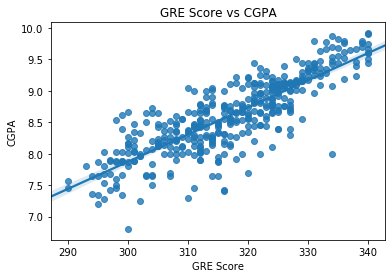

In [12]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Bien qu'il y ait des exceptions, les personnes ayant une CGPA plus élevée ont généralement des scores GRE plus élevés, peut-être parce qu'elles sont intelligentes ou travaillent dur

TypeError: 'float' object cannot be interpreted as an integer

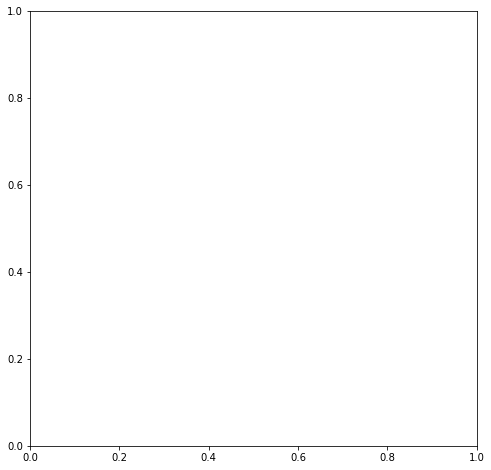

In [13]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

## Echantillonage des données<a name="Echantillonage"></a>

On divise le dataset en deux échantillons: apprentissage et test

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

In [15]:
X_train.shape

(320, 7)

In [16]:
X_test.shape

(80, 7)

In [17]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [18]:
y_train.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [19]:
y_test.head()

320    0.75
321    0.73
322    0.72
323    0.62
324    0.67
Name: Chance of Admit , dtype: float64

## Entrainement du Modele et prediction des resultas<a name="prediction"></a>

In [20]:
#Après le fractionnement, vous entraînerez le modèle sur l'ensemble d'entraînement et effectuerez des prédictions sur l'ensemble de test.

### RandomForest<a name="RandomFores"></a>

In [21]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

In [22]:
#Create a Random Forest Model Classifier
regressor = RandomForestRegressor(n_estimators=20, random_state=0)

In [23]:

#Train the model using the training sets y_pred=clf.predict(X_test)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

<h4> Calculer la précision du modele </h4>

In [24]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv =
10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 68.80 %
Standard Deviation: 6.70 %


In [25]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.05458749999999999
Mean Squared Error: 0.005522387500000001
Root Mean Squared Error: 0.07431276808193865


<h4> Discussion des resultats </h4>

zzzzzzzzzzeeeeeeeeeeeeeeffffffffzzzzzzzzzzeeeeeeeeeeeeeeffffffffzzzzzzzzzzeeeeeeeeeeeeeeffffffffzzzzzzzzzzeeeeeeeeeeeeeeffffffffzzzzzzzzzzeeeeeeeeeeeeeeffffffffzzzzzzzzzzeeeeeeeeeeeeeeffffffffzzzzzzzzzzeeeeeeeeeeeeeeffffffffzzzzzzzzzzeeeeeeeeeeeeeeffffffffzzzzzzzzzzeeeeeeeeeeeeeeffffffffzzzzzzzzzzeeeeeeeeeeeeeeffffffffzzzzzzzzzzeeeeeeeeeeeeeeffffffffzzzzzzzzzzeeeeeeeeeeeeeeffffffffzzzzzzzzzzeeeeeeeeeeeeeeffffffffzzzzzzzzzzeeeeeeeeeeeeeeffffffffzzzzzzzzzzeeeeeeeeeeeeeeffffffffzzzzzzzzzzeeeeeeeeeeeeeeffffffffzzzzzzzzzzeeeeeeeeeeeeeeffffffffzzzzzzzzzzeeeeeeeeeeeeeeffffffffzzzzzzzzzzeeeeeeeeeeeeeeffffffffzzzzzzzzzzeeeeeeeeeeeeeeffffffffzzzzzzzzzzeeeeeeeeeeeeeeffffffffzzzzzzzzzzeeeeeeeeeeeeeeffffffff

n<h3> LinearRegression </h3>

In [28]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import r2_score

#Maintenant, pour entraîner le modèle, nous devons créer un objet de régression linéaire
regr = LinearRegression()

#Ensuite, on entraine le modèle à l'aide des ensembles d'apprentissage 
regr.fit(X_train, y_train)


#Ensuite, on fait les prédictions à l'aide de l'ensemble de test
y_pred = regr.predict(X_test)

#Puis, on affiche l'intercept et les coefficients du modèle comme suit


print("Intercept: ", regr.intercept_)
print("Coefficients: ", regr.coef_)


#Ensuite, On affiche le MAE, MSE et RMSE

print("\n\nMean Absolute Error (MAE) : %.2f" % metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): %.2f" % metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): %.2f \n\n" % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



#Par la suite on affiche le coefficient de détermination, noté R2 pour mesuré la precision de notre model
print("Accuracy: %.2f %%" % (r2_score(y_test, y_pred)*100))

Intercept:  -1.2499877857405406
Coefficients:  [ 0.00169643  0.00297888  0.0086779  -0.00546856  0.02770287  0.11618532
  0.01869737]


Mean Absolute Error (MAE) : 0.05
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.06 


Accuracy: 81.10 %


### AdaboostXGBoostClassifierAdmissionPredict <a name="AdaboostXGBoostClassifierAdmissionPredict"></a>

# Decision Tree <a name="Decision Tree"></a>

In [29]:
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeRegressor

In [30]:
#Charger le modele DT
dtmodel = DecisionTreeRegressor()

In [31]:
dtmodel.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [32]:
dtprediction = dtmodel.predict(X_test)

In [36]:
from sklearn.metrics import r2_score

score = r2_score(y_test,dtprediction)

In [42]:
print("Score: %.2f %%" % (score*100))
print("Mean Absolute Error (MAE) : %.2f" % metrics.mean_absolute_error(y_test, dtprediction))
print("Mean Squared Error (MSE): %.2f" % metrics.mean_squared_error(y_test, dtprediction))
print("Root Mean Squared Error (RMSE): %.2f \n\n" % np.sqrt(metrics.mean_squared_error(y_test, dtprediction)))

Score: 59.64 %
Mean Absolute Error (MAE) : 0.06
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.09 




Text(0.5, 0, 'Y test')

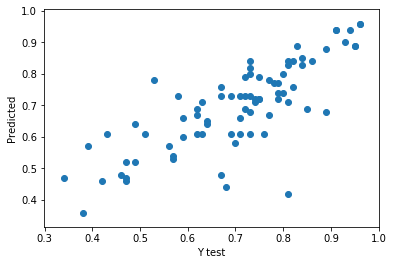

In [43]:
plt.scatter(y_test, dtprediction)
plt.ylabel('Predicted')
plt.xlabel('Y test')

### SVM <a name="SVM"></a>

In [1]:
# Les variables déscriptives
predictors = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
# La variable "Chance d'admission" à prédir
target = df['Chance of Admit ']

from sklearn.svm import SVR
import time

# On divise le dataset en 80% pour l'entraînement et 20% pour le test.
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2)

"""
    J'ai créer cette fonction, car que je voulais comparer la prédiction avec 3 algorithmes différents:
        SVR à noyeau RBF.
        SVR à noyeau Linéaire.
        Régréssion Linéaire. (à enlever car Youness l'a déjà fait)
    @Paramètres : ('Nom de l'algorithme', 'Le modèle correspondant', 'Variables déscriptives de l'entrainement',
        'Variables à prédir de l'entrainement', 'Variables déscriptives du test','Variables à prédir du test')
    @Retour : Retourne une chaîne de caractères qui contient Le nom de l'algorithme + son Score
        Un tableau des valeurs réels.
        Un tableau des valeurs prédites. (Qui serviront par la suite à plot les données de comparaisons)
        
"""
def launch_model(name, model, X_train, y_train, X_test, y_test):
    start = time.time()
    model.fit(X_train[predictors], y_train)
    y_pred = model.predict(X_test[predictors])
    ypred_train = model.predict(X_train[predictors])
    """
        On distingue entre deux type de calcul d'erreur 
            Mean squared (Racine carrée des différence / nombre d'observations)
            Mean absolute (Le même calcul sans racine ni carrée)
    """
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, ypred_train))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    score = model.score(X_test[predictors], y_test)
    print ('Score test', score)
    print('Temps d\'éxecution: {0:.2f} secondes.'.format(time.time() - start))
    return name + '($Score={:.3f}$)'.format(score), np.array(y_test), y_pred

svr_rbf = SVR(kernel='rbf', gamma=0.1)
svr_lineaire = SVR(kernel='linear')

results = []
print ('-----------')
print ('SVR - RBF')
print ('-----------')
results.append(launch_model('SVR - RBF', svr_rbf, X_train, y_train, X_test, y_test))
print ('-----------')
print ('SVR - linéaire')
print ('-----------')
results.append(launch_model('SVR - linéaire', svr_lineaire, X_train, y_train, X_test, y_test))

"""
    On remarque qu'une simple régression linéaire nous a permis d'avoir le meilleur résultat avec 
    81% d'accuracy.Alors qu'on a obtenu un score de 78% pourcent avec le SVR linéaire et 63% avec le SVR RBF.
    Ce qui montre que ce n'est pas toujours l'algorithme puissant qui performe le mieu,
    mais le plus adapté au problème (Ici problème de régréssion).
"""

NameError: name 'df' is not defined

<h4> Discussion des resultats </h4>

<h3><SVM/hh3>

## Conclusion <a name="conclusion"></a>

Purpose of this project was to identify Berlin areas close to center with low number of restaurants (particularly Italian restaurants) in order to aid stakeholders in narrowing down the search for optimal location for a new Italian restaurant. By calculating restaurant density distribution from Foursquare data we have first identified general boroughs that justify further analysis (Kreuzberg and Friedrichshain), and then generated extensive collection of locations which satisfy some basic requirements regarding existing nearby restaurants. Clustering of those locations was then performed in order to create major zones of interest (containing greatest number of potential locations) and addresses of those zone centers were created to be used as starting points for final exploration by stakeholders.

Final decission on optimal restaurant location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc.